In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r'C:\Users\Kerry\spotify_top_1000_tracks.csv')
print(data.shape)
data.head()

(1000, 8)


,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2/9/2018,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,11/25/2016,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Senorita,Shawn Mendes,Senorita,6/21/2019,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,8/7/2020,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,8/5/2016,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433


In [16]:
data.isnull().sum()

track_name      0
artist          0
album           0
release_date    0
popularity      0
spotify_url     0
id              0
duration_min    0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [19]:
data.describe()

,popularity,duration_min
count,1000.000000,1000.000000
mean,56.669000,3.318516
std,28.192805,0.849591
min,0.000000,0.969150
25%,37.000000,2.754021
50%,68.000000,3.293833
75%,79.000000,3.745721
max,97.000000,9.497883


In [20]:
print(data['artist'].value_counts().head(10))

artist
The Weeknd       26
Taylor Swift     25
Avril Lavigne    21
Alan Walker      14
Ariana Grande    12
Selena Gomez     12
Ed Sheeran       11
Justin Bieber    11
Katy Perry        9
Badscandal        9
Name: count, dtype: int64


### Distribution of Popularity

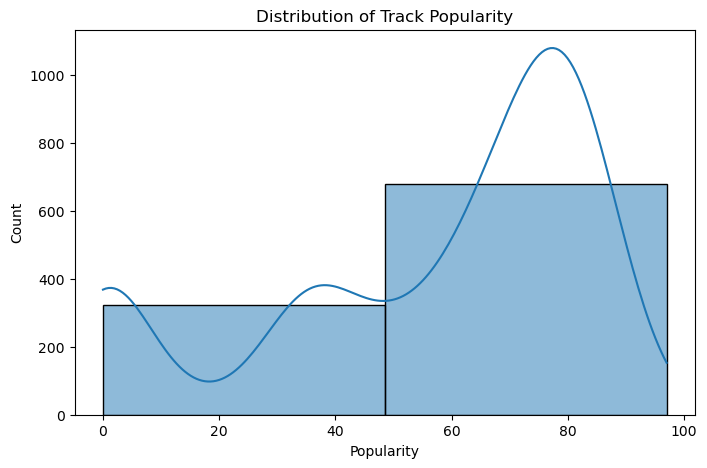

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(data['popularity'], bins=2, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

### Track duration analysis

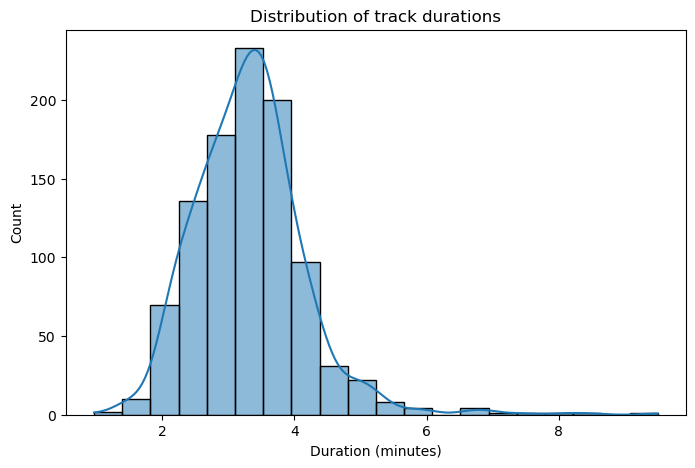

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data['duration_min'], bins=20, kde=True)
plt.title('Distribution of track durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

### Popularity over time

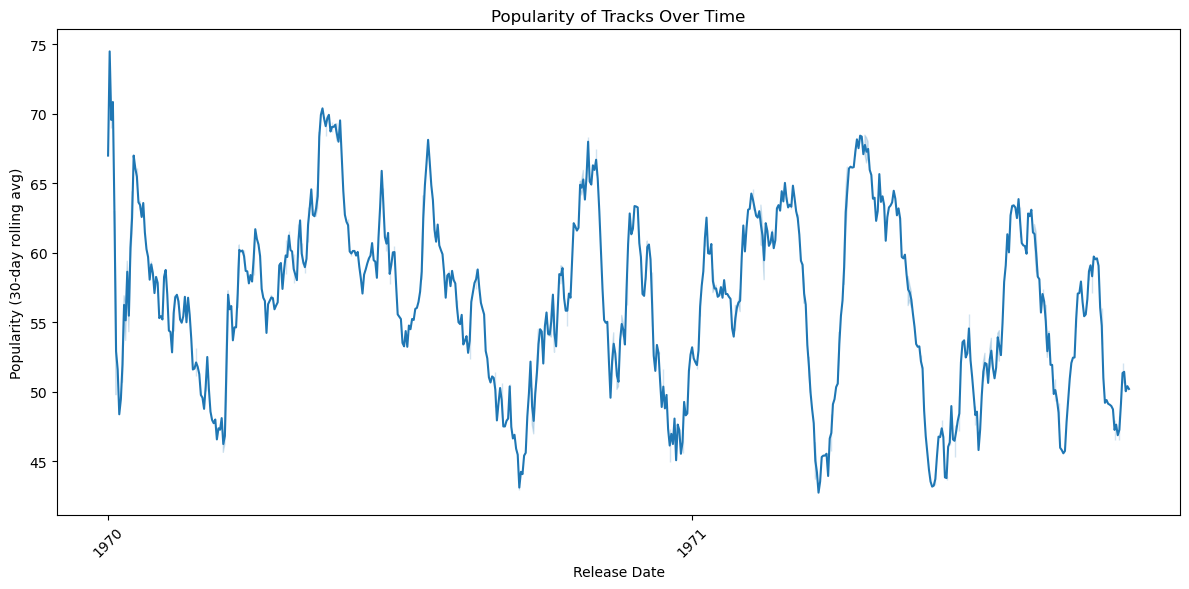

In [23]:
data_sorted = data.sort_values(by='release_date')
data_sorted['rolling_popularity'] = data_sorted['popularity'].rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sorted, x='release_date', y='rolling_popularity')
plt.title('Popularity of Tracks Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity (30-day rolling avg)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
